This notebook we will work On KNN


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import train_test_split
from sklearn import neighbors
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
SEED = 42

In [3]:
# Read processe file
df = pd.read_csv('../data/processed_balanced_transaction.csv')
df.shape

(872136, 34)

#### Lets separate Level and features, Scaled features

In [4]:
X, y = df.drop(['isFraud'],axis=1), df['isFraud']

Split data into train test

We are spliting data into train and test with ratio 30%. Means 30% test and 70% train data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=SEED)

#### Create a KNN classifier and fit all features

In [5]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [6]:
from sklearn import metrics
target_names = ['Not Fraud', 'Fraud']
print(metrics.classification_report(y_test, y_pred, digits=3, target_names=target_names))

              precision    recall  f1-score   support

   Not Fraud      1.000     0.928     0.963    130734
       Fraud      0.933     1.000     0.965    130907

    accuracy                          0.964    261641
   macro avg      0.966     0.964     0.964    261641
weighted avg      0.966     0.964     0.964    261641



### Converting to standard scale and fit again

In [6]:
from sklearn.preprocessing import StandardScaler
X, y = df.drop(['isFraud'],axis=1), df['isFraud']
# scale the features by standard scaler
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872136 entries, 0 to 872135
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   accountNumber                  872136 non-null  int64  
 1   acqCountry                     872136 non-null  int64  
 2   availableMoney                 872136 non-null  float64
 3   cardCVV                        872136 non-null  int64  
 4   cardLast4Digits                872136 non-null  int64  
 5   cardPresent                    872136 non-null  int64  
 6   creditLimit                    872136 non-null  float64
 7   currentBalance                 872136 non-null  float64
 8   customerId                     872136 non-null  int64  
 9   enteredCVV                     872136 non-null  int64  
 10  expirationDateKeyInMatch       872136 non-null  int64  
 11  isFraud                        872136 non-null  int64  
 12  merchantCategoryCode          

In [9]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [10]:
print(metrics.classification_report(y_test, y_pred, digits=3, target_names=target_names))

              precision    recall  f1-score   support

   Not Fraud      1.000     0.928     0.963    130734
       Fraud      0.933     1.000     0.965    130907

    accuracy                          0.964    261641
   macro avg      0.966     0.964     0.964    261641
weighted avg      0.966     0.964     0.964    261641



#### Cross validation

we are going to apply k-fold cross-validation.

it will split the original data set into k subsets and use one of the subsets as the testing set and the remaining as the training sets. This process iterated k times until every subset have been used as the testing set. Since 10-fold cross-validation is the most popular one, we are going to use that on

Average score: 0.96


Text(0.5, 1.0, 'Average score: 0.9600307924936011')

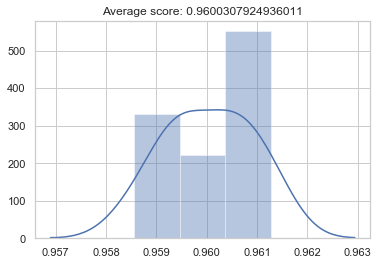

In [11]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
cv_scores = cross_val_score(knn, X_train, y_train, cv=10)
print('Average score: {}'.format(round(np.mean(cv_scores),3)))
sns.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

#### Parameter Tuning

In classification technique, there are some parameters that can be tuned to optimize the classification. 
In DecessionTreeClassifier we can tune 

- n_neighbors
- leaf_size
- algorithm
- n_jobs

Grid Search explores a range of parameters and finds the best combination of parameters. Then repeat the process several times until the best parameters are discovered. 
lets use grid search to get best params



In [9]:
#Hyper Parameters Set
params = {'n_neighbors':[5,6],
          'leaf_size':[2,3],
          }

#Use GridSearch
grid_search = GridSearchCV(KNeighborsClassifier(), params, cv=10, n_jobs=-1)
#Fit the model
grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

best_KNN = grid_search.best_estimator_

Best score: 0.9600307924936011
Best parameters: {'leaf_size': 2, 'n_neighbors': 5}


In [12]:
best_KNN.fit(X_train, y_train)
y_pred_knn = best_KNN.predict(X_test)

In [16]:
from sklearn import metrics
target_names = ['Not Fraud', 'Fraud']
print(metrics.classification_report(y_test, y_pred_knn, digits=3, target_names=target_names))

              precision    recall  f1-score   support

   Not Fraud      1.000     0.928     0.963    130734
       Fraud      0.933     1.000     0.965    130907

    accuracy                          0.964    261641
   macro avg      0.966     0.964     0.964    261641
weighted avg      0.966     0.964     0.964    261641



### confusion_matrix for KNN Model

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [18]:
y_test00=y_test.replace({0:'Not Fraud',1:'Fraud'})

In [19]:
y_pred_knn_cv00=pd.DataFrame(y_pred_knn).replace({0:'Not Fraud',1:'Fraud'})

Confusion matrix, without normalization
[[121330   9404]
 [     0 130907]]


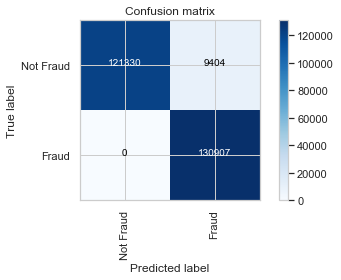

In [20]:
cnf_matrix = metrics.confusion_matrix(y_test00, y_pred_knn_cv00,labels=target_names)
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')

### Save best model

In [23]:
import pickle

lookup ={
    1 : 'Fraud', 0:'Not Fraud'
}

pickle.dump(best_KNN, open('../saved_models/dtc_model.pkl','wb'))
model = pickle.load(open('../saved_models/dtc_model.pkl','rb'))
